# H1B Visa Prediction 


Project By - Sri Shravani Kondeti- Tevi Lawson- Ugochi Madumere- Aparna Rachoori- Promodini Venkatakrishnan 


BCIS 5140 – Fall 2020

In [1]:
import matplotlib.pyplot as plt
import pandas      as pd
import numpy       as np
import seaborn as sns
import sklearn

In [2]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [3]:
h1bdf = pd.read_csv(r"C:\Users\UGOCHI\OneDrive - UNT System\AI\H1B Dataset2.csv", encoding='ISO-8859-1')

C:\Users\UGOCHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
h1bdf.shape

(528134, 27)

In [5]:
h1bdf.dropna(inplace=True)

In [6]:
h1bdf.shape

(517745, 27)

In [7]:
h1bdf.VISA_CLASS.value_counts()

H1B               517265
E3 Australian        363
H1B1 Singapore        61
H1B1 Chile            56
Name: VISA_CLASS, dtype: int64

In [8]:
h1bdf.SOC_NAME.value_counts()

COMPUTER OCCUPATION                  240883
ANALYSTS                             110624
ENGINEERS                             43373
SCIENTIST                             17440
FINANCE                               12934
DOCTORS                               12750
EDUCATION                             12088
ACCOUNTANTS                           10530
MARKETING                             10393
IT MANAGERS                            6008
MANAGERS                               5035
MATHEMATICIANS AND STATISTICIANS       4951
HUMAN RESOURCES                        3055
ARCHITECTURE                           2336
LAWYERS AND LEGAL SUPPORT WORKERS      2180
DESIGNERS                              2019
LAB TECHNICIANS                        2003
GRAPHIC DESIGNERS                      1959
LOGISTICIANS                           1738
HEALTHCARE                             1683
INTERNIST                              1492
PUBLIC RELATIONS                       1089
BUSINESS OPERATIONS SPECIALIST  

In [9]:
indexNames = h1bdf[h1bdf['VISA_CLASS'] == 'E3 Australian'].index
indexNames

Int64Index([  2904,   3125,   3812,   4010,   4063,   4065,   4338,   4690,
              5028,   5536,
            ...
            521790, 521794, 522487, 523440, 524108, 524135, 526570, 527052,
            527583, 527982],
           dtype='int64', length=363)

In [10]:
h1bdf.drop(indexNames , inplace=True)


In [11]:
indexNames = h1bdf[h1bdf['VISA_CLASS'] == 'H1B1 Singapore'].index
indexNames

Int64Index([  7302,   8510,  32551,  51778,  54250,  54251,  55352,  56249,
             65388,  68023,  72225,  78169,  89423,  97101,  98352, 105594,
            108785, 109112, 111750, 112293, 113358, 113359, 117004, 119736,
            121892, 123153, 123852, 145276, 151317, 155350, 213303, 213343,
            230793, 240011, 341743, 344970, 346390, 354317, 400052, 409631,
            415925, 422704, 429784, 437673, 440482, 450386, 460178, 479379,
            481959, 483083, 483939, 490840, 494421, 496690, 497845, 500312,
            501449, 516290, 516482, 516498, 525801],
           dtype='int64')

In [12]:
h1bdf.drop(indexNames , inplace=True)


In [13]:
indexNames = h1bdf[h1bdf['VISA_CLASS'] == 'H1B1 Chile'].index
indexNames

Int64Index([  6708,   7080,   8291,  16256,  19881,  23063,  28763,  29265,
             30599,  36228,  49710,  54623,  55036,  60849,  68928,  77181,
             89623,  93644,  93645,  94399, 104395, 106191, 112779, 114926,
            123594, 129805, 136010, 138868, 139523, 152213, 207527, 211339,
            229131, 301915, 342907, 379190, 379191, 405475, 414544, 418530,
            420643, 421577, 429036, 456477, 457791, 466290, 472153, 481515,
            483555, 483581, 486440, 490225, 491440, 492720, 506686, 521974],
           dtype='int64')

In [14]:
h1bdf.drop(indexNames , inplace=True)


In [15]:
h1bdf.shape

(517265, 27)

In [16]:
#made a deep copy of dataset
cdf = h1bdf.copy()

In [17]:
cdf.CASE_STATUS.value_counts()

CERTIFIED             459833
CERTIFIEDWITHDRAWN     35559
WITHDRAWN              15685
DENIED                  6188
Name: CASE_STATUS, dtype: int64

In [18]:
case_status = {
   'CASE_STATUS': {
      r'(PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED|REJECTED|INVALIDATED)':'DENIED',
      r'CERTIFIEDWITHDRAWN': 'CERTIFIED'}
}
cdf.replace(case_status, regex=True, inplace=True)

# drop rows with 'WITHDRAWN' value 
indexNames = cdf[cdf['CASE_STATUS']=='WITHDRAWN'].index
cdf.drop(indexNames , inplace=True)

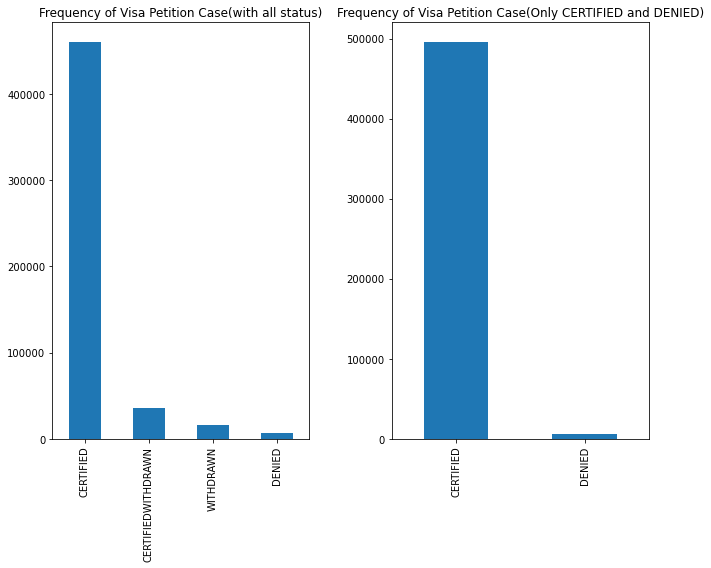

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
h1bdf['CASE_STATUS'].value_counts().plot(kind='bar',title='Frequency of Visa Petition Case(with all status)')
plt.subplot(1, 2, 2)
cdf['CASE_STATUS'].value_counts().plot(kind='bar',title='Frequency of Visa Petition Case(Only CERTIFIED and DENIED)')
plt.tight_layout()
plt.show()

In [20]:
print('Summary of EMPLOYER_NAME column: ',cdf.EMPLOYER_NAME.describe())
print('Summary of SOC_NAME column: : ',cdf.SOC_NAME.describe())

Summary of EMPLOYER_NAME column:  count              501580
unique              57656
top       INFOSYS LIMITED
freq                17032
Name: EMPLOYER_NAME, dtype: object
Summary of SOC_NAME column: :  count                  501580
unique                     56
top       COMPUTER OCCUPATION
freq                   239646
Name: SOC_NAME, dtype: object


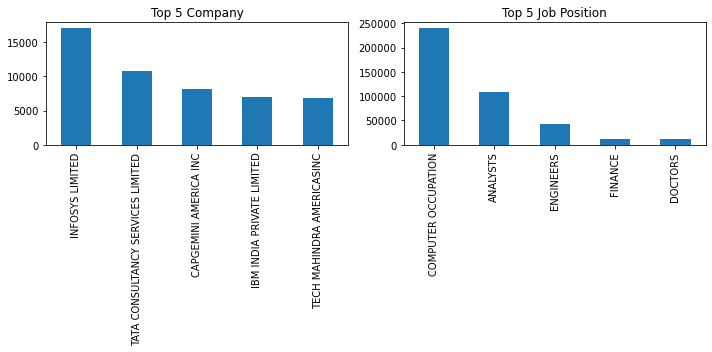

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
cdf.EMPLOYER_NAME.value_counts().head(5).plot(kind='bar',title='Top 5 Company')
plt.subplot(1, 2, 2)
cdf.SOC_NAME.value_counts().head(5).plot(kind='bar',title='Top 5 Job Position')
plt.tight_layout()
plt.show()

In [22]:
print('Median: ',np.nanmedian(cdf.PREVAILING_WAGE))
print('Mean: ',np.nanmean(cdf.PREVAILING_WAGE))

cdf.PREVAILING_WAGE.describe()

Median:  68827.0
Mean:  71560.64139206112


count    501580.000000
mean      71560.641392
std       31451.011479
min           0.000000
25%       55910.000000
50%       68827.000000
75%       86902.000000
max      414007.000000
Name: PREVAILING_WAGE, dtype: float64

<ipython-input-35-ee75189f8882>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 720x576 with 0 Axes>

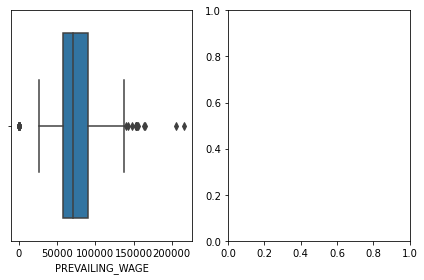

In [35]:
plt.figure(figsize=(10,8))
fig, ax =plt.subplots(1,2)
sns.boxplot(x=h1bdf.PREVAILING_WAGE.head(500),ax=ax[0])
#sns.boxplot(x="CASE_STATUS", y="PREVAILING_WAGE", h1bdf=cdf.head(100),palette="Blues",ax=ax[1])
plt.tight_layout()
fig.show()

(0.0, 300000.0)

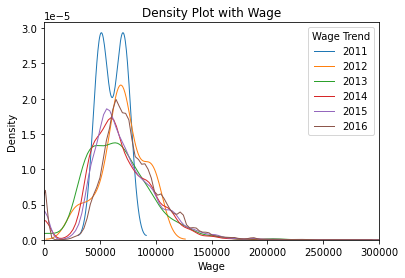

In [36]:
years = [2011, 2012, 2013,2014,2015,2016]

# Iterate through the five airlines
for year in years:
    # Subset to the airline
    subset = h1bdf[h1bdf['CASE_SUBMITTED_YEAR'] == year]
    # Draw the density plot
    sns.distplot(subset['PREVAILING_WAGE'], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = year)    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Wage Trend')
plt.title('Density Plot with Wage')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.xlim(0,300000)

In [37]:
cdf.WORKSITE_STATE.describe()

count     501580
unique        55
top           CA
freq       95364
Name: WORKSITE_STATE, dtype: object

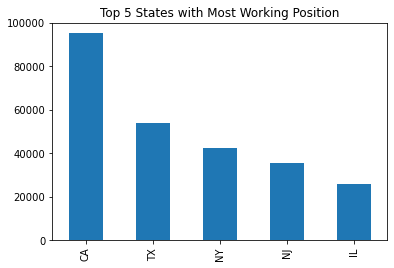

In [38]:
cdf.WORKSITE_STATE.value_counts().head(5).plot(kind='bar',title='Top 5 States with Most Working Position')

In [39]:
h1bdf['FULL_TIME_POSITION'] = h1bdf['FULL_TIME_POSITION'].replace(['Y'],1)
h1bdf['FULL_TIME_POSITION'] = h1bdf['FULL_TIME_POSITION'].replace(['N'],0)
#h1bdf.head()
h1bdf.FULL_TIME_POSITION.value_counts()

1    505467
0     11798
Name: FULL_TIME_POSITION, dtype: int64

In [40]:
h1bdf['WILLFUL_VIOLATOR'] = h1bdf['WILLFUL_VIOLATOR'].replace(['Y'],1)
h1bdf['WILLFUL_VIOLATOR'] = h1bdf['WILLFUL_VIOLATOR'].replace(['N'],0)
#h1bdf.head()
h1bdf.WILLFUL_VIOLATOR.value_counts()

0    516846
1       419
Name: WILLFUL_VIOLATOR, dtype: int64

In [41]:
h1bdf['H-1B_DEPENDENT'] = h1bdf['H-1B_DEPENDENT'].replace(['Y'],1)
h1bdf['H-1B_DEPENDENT'] = h1bdf['H-1B_DEPENDENT'].replace(['N'],0)
h1bdf.head(2)
#h1bdf.H-1B_DEPENDENT.value_counts()

,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
0,24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,0,0,IL,60015,CERTIFIEDWITHDRAWN
1,4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,0,0,IL,60015,CERTIFIEDWITHDRAWN


In [42]:
h1bdf.CASE_STATUS.value_counts()

CERTIFIED             459833
CERTIFIEDWITHDRAWN     35559
WITHDRAWN              15685
DENIED                  6188
Name: CASE_STATUS, dtype: int64

In [43]:
h1bdf_C = h1bdf[h1bdf['CASE_STATUS'] == 'CERTIFIED']

In [44]:
h1bdf_C.shape

(459833, 27)

In [45]:
from sklearn.utils import resample

h1bdf_C_downsampled = resample(h1bdf_C,replace=False,n_samples=50000,random_state=123)                                   
h1bdf_C_downsampled.shape

(50000, 27)

In [46]:
h1bdf_NotCertified = h1bdf[h1bdf['CASE_STATUS'] != 'CERTIFIED']

In [47]:
h1bdf_NotCertified.CASE_STATUS.value_counts()

CERTIFIEDWITHDRAWN    35559
WITHDRAWN             15685
DENIED                 6188
Name: CASE_STATUS, dtype: int64

In [48]:
h1bdf_sampled = pd.concat([h1bdf_NotCertified,h1bdf_C_downsampled],ignore_index=True)

In [49]:
h1bdf_sampled.CASE_STATUS.value_counts()

CERTIFIED             50000
CERTIFIEDWITHDRAWN    35559
WITHDRAWN             15685
DENIED                 6188
Name: CASE_STATUS, dtype: int64

In [50]:
X= h1bdf_sampled.iloc[:,:-1].values
y= h1bdf_sampled.iloc[:,-1].values

In [51]:
y

array(['CERTIFIEDWITHDRAWN', 'CERTIFIEDWITHDRAWN', 'CERTIFIEDWITHDRAWN',
       ..., 'CERTIFIED', 'CERTIFIED', 'CERTIFIED'], dtype=object)

In [52]:
y.shape

(107432,)

In [53]:
from sklearn import preprocessing
lab_encode = preprocessing.LabelEncoder()
lab_encode.fit(y)
list(lab_encode.classes_)
y1 = lab_encode.transform(y)

In [54]:
y1

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
y1.shape

(107432,)

In [56]:
#cdf_class_c = cdf[cdf.CASE_STATUS=='CERTIFIED']
#cdf_class_d = cdf[cdf.CASE_STATUS=='DENIED']

In [57]:
col_array = ['CASE_SUBMITTED_YEAR','EMPLOYER_NAME','EMPLOYER_STATE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','PW_SOURCE','WAGE_RATE_OF_PAY_FROM']

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numh1bdf = h1bdf_sampled.select_dtypes(include=numerics)
X_num = numh1bdf.to_numpy()

In [59]:
X_num

array([[2.40000e+01, 2.00000e+00, 2.01600e+03, ..., 6.73200e+04,
        0.00000e+00, 0.00000e+00],
       [4.00000e+00, 3.00000e+00, 2.01600e+03, ..., 5.72000e+04,
        0.00000e+00, 0.00000e+00],
       [1.00000e+01, 3.00000e+00, 2.01600e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [2.00000e+00, 2.00000e+00, 2.01700e+03, ..., 1.36652e+05,
        0.00000e+00, 0.00000e+00],
       [2.50000e+01, 4.00000e+00, 2.01700e+03, ..., 9.55000e+04,
        1.00000e+00, 0.00000e+00],
       [1.70000e+01, 1.00000e+00, 2.01700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [60]:
X_num.shape

(107432, 15)

In [61]:
objh1bdf = h1bdf_sampled.select_dtypes(include=['object']).drop(["WORKSITE_POSTAL_CODE", "EMPLOYER_NAME", "EMPLOYER_COUNTRY", "WAGE_UNIT_OF_PAY", "PW_UNIT_OF_PAY","VISA_CLASS"], axis=1)
objh1bdf.head(2)

,EMPLOYER_STATE,SOC_NAME,PW_SOURCE,PW_SOURCE_OTHER,WORKSITE_STATE,CASE_STATUS
0,IL,ANALYSTS,OES,OFLC ONLINE DATA CENTER,IL,CERTIFIEDWITHDRAWN
1,IL,ANALYSTS,Other,WILLIS TOWERS WATSON SURVEY,IL,CERTIFIEDWITHDRAWN


In [62]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_cat = enc.fit_transform([[x,y,z,w,p] for x,y,z,w,p in zip(objh1bdf['EMPLOYER_STATE'], objh1bdf['SOC_NAME'], objh1bdf['PW_SOURCE'], objh1bdf['PW_SOURCE_OTHER'],objh1bdf['WORKSITE_STATE'])]).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
X_cat.shape

(107432, 340)

In [64]:
X = np.hstack((X_num,X_cat))
X

array([[2.400e+01, 2.000e+00, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e+00, 3.000e+00, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+01, 3.000e+00, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 2.000e+00, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.500e+01, 4.000e+00, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.700e+01, 1.000e+00, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [65]:
X.shape

(107432, 355)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y1, test_size = 0.15, random_state = 101)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 101)

In [69]:
from sklearn.linear_model import LogisticRegression
h1b_logreg = LogisticRegression(multi_class='ovr')
h1b_logreg

LogisticRegression(multi_class='ovr')

In [70]:
h1b_logreg.fit(X_train,y_train)

C:\Users\UGOCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UGOCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression(multi_class='ovr')

In [71]:
pred = h1b_logreg.predict(X_test)
pred

array([0, 0, 2, ..., 0, 3, 0])

In [72]:
pred_v = h1b_logreg.predict(X_val)
pred_v

array([1, 0, 0, ..., 3, 0, 1])

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7491
           1       0.85      0.89      0.87      5287
           2       0.62      0.21      0.31       956
           3       0.69      0.64      0.67      2381

    accuracy                           0.82     16115
   macro avg       0.75      0.66      0.68     16115
weighted avg       0.80      0.82      0.80     16115



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred_v))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      8441
           1       0.85      0.89      0.87      6078
           2       0.66      0.21      0.32      1070
           3       0.71      0.63      0.67      2675

    accuracy                           0.82     18264
   macro avg       0.76      0.66      0.68     18264
weighted avg       0.81      0.82      0.80     18264



In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[6727,  479,   56,  229],
       [ 495, 4687,    7,   98],
       [ 386,   26,  197,  347],
       [ 499,  301,   57, 1524]], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pred_v)

array([[7573,  586,   46,  236],
       [ 557, 5410,    7,  104],
       [ 442,   52,  229,  347],
       [ 609,  309,   67, 1690]], dtype=int64)

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.7028855103940428

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, pred_v)

0.7022010512483574

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='macro')

0.6768180978796374

In [80]:
from sklearn.metrics import f1_score
f1_score(y_val, pred_v, average='macro')

0.6803557337770706

In [81]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.6424819162346354

In [82]:
from sklearn import metrics
fpr_v, tpr_v, thresholds_v = metrics.roc_curve(y_val, pred_v, pos_label=2)
metrics.auc(fpr_v, tpr_v)

0.6317464579580575

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.815079118833385

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred_v)

0.815922032413491

In [85]:
from sklearn.linear_model import LogisticRegression
h1b_logreg1 = LogisticRegression(multi_class='multinomial')
h1b_logreg1

LogisticRegression(multi_class='multinomial')

In [86]:
h1b_logreg1.fit(X_train,y_train)

C:\Users\UGOCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [87]:
pred1 = h1b_logreg1.predict(X_test)
pred1

array([0, 0, 2, ..., 0, 3, 0])

In [88]:
pred1_v = h1b_logreg1.predict(X_val)
pred1_v

array([1, 0, 0, ..., 3, 0, 1])

In [89]:
pred1_v_log_prob = h1b_logreg1.predict_log_proba(X_val)
pred1_v_log_prob.shape

(18264, 4)

In [90]:
pred1_v_prob = h1b_logreg1.predict_proba(X_val)
pred1_v_prob

array([[0.35572679, 0.61013338, 0.00760042, 0.02653941],
       [0.92436789, 0.0294889 , 0.01403263, 0.03211058],
       [0.93747291, 0.02989043, 0.01028504, 0.02235162],
       ...,
       [0.0708081 , 0.05304316, 0.10378142, 0.77236731],
       [0.62676383, 0.03089122, 0.1684084 , 0.17393655],
       [0.13988077, 0.82489024, 0.00749099, 0.027738  ]])

In [91]:
maxarray_v = np.amax(pred1_v_prob,axis=1)

In [92]:
indexarray_v = np.argmax(pred1_v_prob,axis=1)

In [93]:
np.unique(indexarray_v)

array([0, 1, 2, 3], dtype=int64)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      7491
           1       0.87      0.87      0.87      5287
           2       0.57      0.24      0.34       956
           3       0.69      0.64      0.66      2381

    accuracy                           0.82     16115
   macro avg       0.74      0.67      0.69     16115
weighted avg       0.81      0.82      0.81     16115



In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred1_v))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      8441
           1       0.87      0.88      0.88      6078
           2       0.62      0.25      0.36      1070
           3       0.71      0.63      0.66      2675

    accuracy                           0.82     18264
   macro avg       0.76      0.67      0.69     18264
weighted avg       0.81      0.82      0.81     18264



In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred1)

array([[6806,  374,   84,  227],
       [ 526, 4613,    7,  141],
       [ 375,   17,  230,  334],
       [ 482,  286,   84, 1529]], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pred1_v)

array([[7719,  438,   59,  225],
       [ 588, 5345,    7,  138],
       [ 436,   28,  266,  340],
       [ 598,  300,   96, 1681]], dtype=int64)

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred1)

0.699162271175923

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, pred1_v)

0.6918528252299606

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test, pred1, average='macro')

0.6853554861617333

In [101]:
from sklearn.metrics import f1_score
f1_score(y_val, pred1_v, average='macro')

0.6912249927784235

In [102]:
from sklearn import metrics
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred1, pos_label=2)
metrics.auc(fpr1, tpr1)

0.649960178040249

In [103]:
from sklearn import metrics
fpr1_v, tpr1_v, thresholds1_v = metrics.roc_curve(y_val, pred1_v, pos_label=2)
metrics.auc(fpr1_v, tpr1_v)

0.6404443410492032

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.8177474402730376

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred1_v)

0.8218900569426194

In [106]:
from sklearn.metrics import precision_score
precision_score(y_test, pred1, average='macro')

0.7390954311714748

In [107]:
from sklearn.metrics import precision_score
precision_score(y_val, pred1_v, average='macro')

0.7569054910681504

In [108]:
from sklearn.metrics import recall_score
recall_score(y_test, pred1, average='macro')

0.6659568403620939

In [109]:
from sklearn.metrics import recall_score
recall_score(y_val, pred1_v, average='macro')

0.6677188938380835

In [110]:
from sklearn.linear_model import SGDClassifier
h1b_SGD = SGDClassifier()
h1b_SGD

SGDClassifier()

In [111]:
h1b_SGD.fit(X_train,y_train)

SGDClassifier()

In [112]:
pred2 = h1b_SGD.predict(X_test)
pred2

array([0, 0, 2, ..., 0, 3, 0])

In [113]:
pred2_v = h1b_SGD.predict(X_val)
pred2_v

array([1, 0, 0, ..., 3, 0, 1])

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7491
           1       0.79      0.92      0.85      5287
           2       0.54      0.20      0.29       956
           3       0.73      0.61      0.67      2381

    accuracy                           0.80     16115
   macro avg       0.72      0.64      0.66     16115
weighted avg       0.79      0.80      0.79     16115



In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred2_v))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      8441
           1       0.79      0.92      0.85      6078
           2       0.56      0.21      0.30      1070
           3       0.74      0.59      0.66      2675

    accuracy                           0.80     18264
   macro avg       0.73      0.64      0.66     18264
weighted avg       0.79      0.80      0.79     18264



In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred2)

array([[6347,  898,   89,  157],
       [ 366, 4860,   11,   50],
       [ 368,   68,  190,  330],
       [ 548,  312,   60, 1461]], dtype=int64)

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pred2_v)

array([[7170, 1036,   81,  154],
       [ 391, 5620,    9,   58],
       [ 412,  106,  222,  330],
       [ 677,  336,   88, 1574]], dtype=int64)

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred2)

0.7045609680421967

In [119]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, pred2_v)

0.7110709592641261

In [120]:
from sklearn.metrics import f1_score
f1_score(y_test, pred2, average='macro')

0.6621391351342817

In [121]:
from sklearn.metrics import f1_score
f1_score(y_val, pred2_v, average='macro')

0.6628026045782813

In [122]:
from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, pred2, pos_label=2)
metrics.auc(fpr2, tpr2)

0.6425261820242391

In [123]:
from sklearn import metrics
fpr2_v, tpr2_v, thresholds2_v = metrics.roc_curve(y_val, pred2_v, pos_label=2)
metrics.auc(fpr2_v, tpr2_v)

0.6370935742635717

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred2)

0.7978901644430655

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred2_v)

0.7986202365308804

In [126]:
from sklearn.metrics import precision_score
precision_score(y_test, pred2, average='macro')

0.7244585591385154

In [127]:
from sklearn.metrics import precision_score
precision_score(y_val, pred2_v, average='macro')

0.7298825992602821

In [128]:
from sklearn.metrics import recall_score
recall_score(y_test, pred2, average='macro')

0.6447179415054709

In [129]:
from sklearn.metrics import recall_score
recall_score(y_val, pred2_v, average='macro')

0.6424898848035324

In [130]:
from sklearn.linear_model import SGDClassifier
h1b_SGD1 = SGDClassifier(loss='log')
h1b_SGD1

SGDClassifier(loss='log')

In [131]:
h1b_SGD1.fit(X_train,y_train)

SGDClassifier(loss='log')

In [132]:
pred3 = h1b_SGD1.predict(X_val)
pred3

array([1, 0, 0, ..., 3, 0, 1])

In [133]:
pred3_prob = h1b_SGD1.predict_proba(X_test)
pred3_prob

array([[0.92678109, 0.04350293, 0.00909477, 0.02062121],
       [0.89977304, 0.00736028, 0.05163892, 0.04122775],
       [0.04366463, 0.55290355, 0.39159539, 0.01183644],
       ...,
       [0.76716421, 0.03335377, 0.18604956, 0.01343245],
       [0.04498536, 0.11107385, 0.06018759, 0.7837532 ],
       [0.38922187, 0.00338725, 0.27414209, 0.33324878]])

In [134]:
indexarray = np.argmax(pred3_prob,axis=1)

In [135]:
np.unique(indexarray)

array([0, 1, 2, 3], dtype=int64)

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_val,pred3))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      8441
           1       0.77      0.93      0.84      6078
           2       0.60      0.23      0.33      1070
           3       0.71      0.63      0.67      2675

    accuracy                           0.79     18264
   macro avg       0.73      0.65      0.67     18264
weighted avg       0.79      0.79      0.78     18264



In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val,pred3)

array([[6948, 1188,   64,  241],
       [ 352, 5624,    7,   95],
       [ 339,  135,  247,  349],
       [ 571,  329,   92, 1683]], dtype=int64)

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, pred3)

0.6974923346473938

In [139]:
from sklearn.metrics import f1_score
f1_score(y_val, pred3, average='macro')

0.66952063613246

In [140]:
from sklearn import metrics
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_val, pred3, pos_label=2)
metrics.auc(fpr3, tpr3)

0.6661322847896299

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred3)

0.7940210249671484

In [142]:
from sklearn.metrics import recall_score
recall_score(y_val, pred3, average='macro')

0.6521073996424244

In [143]:
from sklearn.metrics import precision_score
precision_score(y_val, pred3, average='macro')

0.733100641383703

# New Section

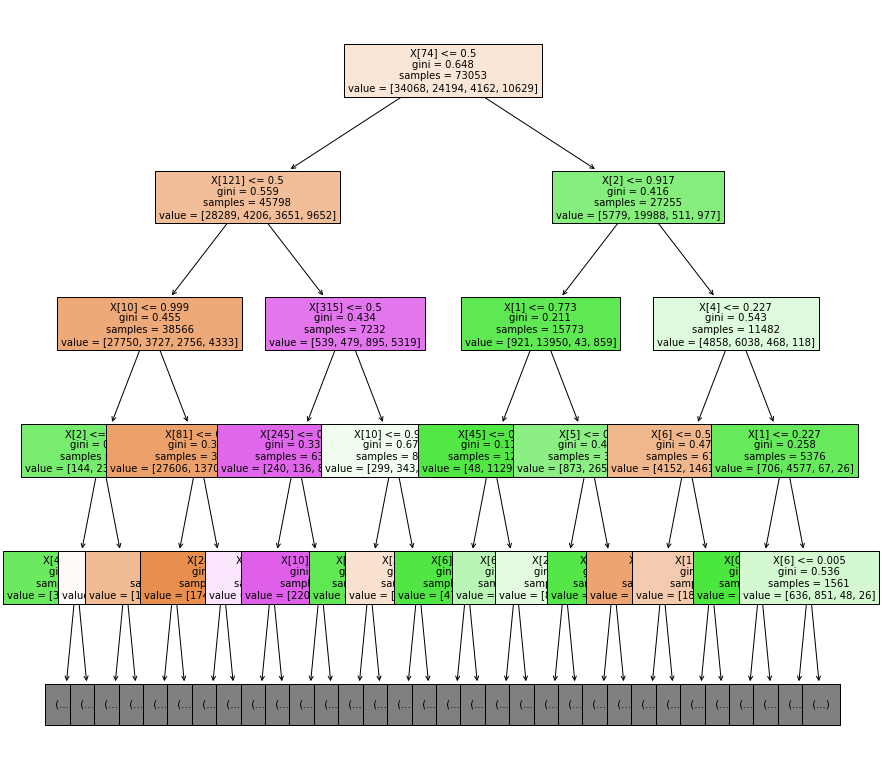

In [144]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz

from sklearn.tree import export_text

from sklearn import tree

from IPython.display import Image

 

dt = tree.DecisionTreeClassifier() #create model

fig, ax = plt.subplots(figsize=(14, 14))

tree.plot_tree(dt.fit(X_train, y_train), max_depth=4, fontsize=10,filled=True) #train model

plt.show()

In [145]:
y_pred = dt.predict(X_test)

 

y_prob = dt.predict_proba(X_test)

 

print("test", y_test[:10])

print("pred", y_pred[:10])

print()

 

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

test [0 0 1 1 1 1 2 1 0 0]
pred [0 0 1 1 1 0 1 1 0 0]

[[6825  130  268  268]
 [ 177 4960   15  135]
 [ 252   27  375  302]
 [ 228  141  220 1792]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7491
           1       0.94      0.94      0.94      5287
           2       0.43      0.39      0.41       956
           3       0.72      0.75      0.73      2381

    accuracy                           0.87     16115
   macro avg       0.75      0.75      0.75     16115
weighted avg       0.86      0.87      0.87     16115



In [146]:
y_pred2 = dt.predict(X_val)
y_prob = dt.predict_proba(X_val)
print("test", y_val[:10])
print("pred", y_pred2[:10])
print()

print(confusion_matrix(y_val,y_pred2))
print(classification_report(y_val, y_pred2))

test [1 0 0 1 3 1 0 1 0 0]
pred [1 0 0 1 3 3 0 1 0 0]

[[7704  183  273  281]
 [ 214 5672   32  160]
 [ 302   41  425  302]
 [ 286  148  256 1985]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8441
           1       0.94      0.93      0.94      6078
           2       0.43      0.40      0.41      1070
           3       0.73      0.74      0.73      2675

    accuracy                           0.86     18264
   macro avg       0.75      0.75      0.75     18264
weighted avg       0.86      0.86      0.86     18264



In [147]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred2)

0.864323258869908

In [148]:
y_val.shape

(18264,)

In [149]:
y_test.shape

(16115,)

In [150]:
y_pred.shape

(16115,)

In [151]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred2)

0.864323258869908

In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.5286379149860378

In [153]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred2)

0.5290735873850198

In [154]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

metrics.auc(fpr, tpr)

0.7031856325736593

In [155]:
from sklearn import metrics

fprdv, tprdv, thresholdsdv = metrics.roc_curve(y_val,y_pred2, pos_label=2)

metrics.auc(fprdv, tprdv)

0.6893123443409405

In [156]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

0.7490101769283986

In [157]:
from sklearn.metrics import f1_score

f1_score(y_val, y_pred2, average='macro')

0.7483019347074875

In [158]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7500704917786123

In [159]:
from sklearn.metrics import precision_score

precision_score(y_val, y_pred2, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7507096873958239

In [160]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7485319633468457

In [161]:
from sklearn.metrics import recall_score

recall_score(y_val, y_pred2, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7462855294179107

In [162]:
from sklearn.ensemble import RandomForestClassifier # <- Random Forest Classifier

In [163]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50) #Build (no. of estimators can be increased)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [164]:
y_pred_rf =  rf.predict(X_val) #Predict
probs = rf.predict_proba(X_val)

print("test", y_val[:10])
print("pred", y_pred_rf[:10])
print(confusion_matrix(y_val,y_pred_rf))
print(classification_report(y_val, y_pred_rf))

test [1 0 0 1 3 1 0 1 0 0]
pred [1 0 0 1 3 1 0 1 0 0]
[[8163  152   27   99]
 [ 274 5776    2   26]
 [ 436   31  300  303]
 [ 449  196   87 1943]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      8441
           1       0.94      0.95      0.94      6078
           2       0.72      0.28      0.40      1070
           3       0.82      0.73      0.77      2675

    accuracy                           0.89     18264
   macro avg       0.84      0.73      0.76     18264
weighted avg       0.88      0.89      0.88     18264



In [165]:
y_pred_rf2 =  rf.predict(X_test) #Predict
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_rf2[:10])
print(confusion_matrix(y_test,y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))

test [0 0 1 1 1 1 2 1 0 0]
pred [0 0 1 1 1 0 0 0 0 0]
[[7213  147   36   95]
 [ 254 5015    5   13]
 [ 384    9  269  294]
 [ 384  169   65 1763]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7491
           1       0.94      0.95      0.94      5287
           2       0.72      0.28      0.40       956
           3       0.81      0.74      0.78      2381

    accuracy                           0.88     16115
   macro avg       0.84      0.73      0.76     16115
weighted avg       0.88      0.88      0.87     16115



In [166]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred_rf)

0.46654621112571176

In [167]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_rf2)

0.4649705243561899

In [168]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_rf, pos_label=2)
metrics.auc(fpr, tpr)

0.6372803379574923

In [169]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf2, pos_label=2)
metrics.auc(fpr, tpr)

0.6447669004231574

In [170]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_rf, average='macro')

0.7593289649772172

In [171]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rf2, average='macro')

0.760247744433787

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_rf)

0.8860052562417872

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf2)

0.8848898541731306

In [174]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_rf, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.8386834494515897

In [175]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rf2, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.8366715461271663

In [176]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_rf, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7310267720893096

In [177]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rf2, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.7333169496974595

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [179]:
gb = GradientBoostingClassifier(n_estimators = 75, random_state = 50)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=75, random_state=50)

In [180]:
y_pred_gb = gb.predict(X_val)
gb_probs = gb.predict_proba(X_val)

print("test", y_val[:10])
print("pred", y_pred_gb[:10])
print(confusion_matrix(y_val,y_pred_gb))
print(classification_report(y_val, y_pred_gb))

test [1 0 0 1 3 1 0 1 0 0]
pred [1 0 0 0 1 1 0 1 0 0]
[[8022  276   26  117]
 [ 559 5487    5   27]
 [ 510   32  244  284]
 [ 664  256   63 1692]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8441
           1       0.91      0.90      0.90      6078
           2       0.72      0.23      0.35      1070
           3       0.80      0.63      0.71      2675

    accuracy                           0.85     18264
   macro avg       0.81      0.68      0.71     18264
weighted avg       0.84      0.85      0.83     18264



In [181]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred_gb)

0.6309680245291284

In [182]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_gb, pos_label=2)
metrics.auc(fpr, tpr)

0.6037689196079049

In [183]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_gb, average='macro')

0.7097079954042944

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_gb)

0.845652650021901

In [185]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_gb, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')


0.8122866196269914

In [186]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_gb, labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')

0.6784215365966696

In [187]:
#from sklearn.svm import SVC

#svm_clf = SVC(gamma="auto")
#svm_clf.fit(X_train, y_train)

In [188]:
#y_pred_sv =  svm_clf.predict(X_val) #Predict

#print("test", y_val[:10])
#print("pred", y_pred_sv[:10])
#print(confusion_matrix(y_val,y_pred_sv))
#print(classification_report(y_val, y_pred_sv))